# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [733]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [734]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = 0.
    y[y==3] = 1.
    y[y>3] = 2.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print("The shape of the wines dataset:")
    print(data.shape)
    print(y[:10])
    print(X[:10, :])

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(X) # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

In [735]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    print(cr)
    print(f'R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [736]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'SVM - Linear, Test Accuracy = {acc_test}, C={c}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test)

# SVM using Radial Basis Function(RBF) Kernel.

In [737]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'SVM - RBF, Test Accuracy = {acc_test}, C={c}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test)

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [738]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'SVM - Poly, Test Accuracy = {acc_test}, C={c}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test)

In [739]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [740]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [741]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(1599, 12)
[2. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
[[1.0400e+01 4.4000e-01 7.3000e-01 6.5500e+00 7.4000e-02 3.8000e+01
  7.6000e+01 9.9900e-01 3.1700e+00 8.5000e-01 1.2000e+01]
 [7.3000e+00 3.6500e-01 4.9000e-01 2.5000e+00 8.8000e-02 3.9000e+01
  1.0600e+02 9.9660e-01 3.3600e+00 7.8000e-01 1.1000e+01]
 [9.0000e+00 6.0000e-01 2.9000e-01 2.0000e+00 6.9000e-02 3.2000e+01
  7.3000e+01 9.9654e-01 3.3400e+00 5.7000e-01 1.0000e+01]
 [6.9000e+00 6.3000e-01 2.0000e-02 1.9000e+00 7.8000e-02 1.8000e+01
  3.0000e+01 9.9712e-01 3.4000e+00 7.5000e-01 9.8000e+00]
 [6.7000e+00 6.4000e-01 2.3000e-01 2.1000e+00 8.0000e-02 1.1000e+01
  1.1900e+02 9.9538e-01 3.3600e+00 7.0000e-01 1.0900e+01]
 [9.6000e+00 6.8000e-01 2.4000e-01 2.2000e+00 8.7000e-02 5.0000e+00
  2.8000e+01 9.9880e-01 3.1

SVM - Linear, Train Accuracy = 0.6231430805316653, C=0.06
SVM - Linear, Test Accuracy = 0.6125, C=0.06


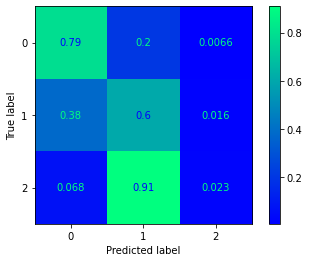

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       152
         1.0       0.51      0.60      0.56       124
         2.0       0.25      0.02      0.04        44

    accuracy                           0.61       320
   macro avg       0.49      0.47      0.45       320
weighted avg       0.57      0.61      0.58       320

R2 Score: 0.14760263240363514

SVM - Linear, Train Accuracy = 0.6262705238467553, C=0.07407926522752892
SVM - Linear, Test Accuracy = 0.61875, C=0.07407926522752892


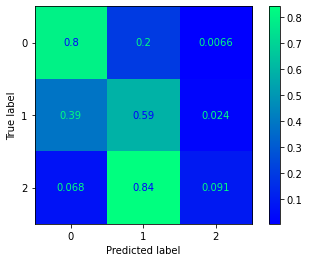

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       152
         1.0       0.52      0.59      0.55       124
         2.0       0.50      0.09      0.15        44

    accuracy                           0.62       320
   macro avg       0.57      0.49      0.48       320
weighted avg       0.60      0.62      0.59       320

R2 Score: 0.16013788780946403

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.09146229227750963
SVM - Linear, Test Accuracy = 0.63125, C=0.09146229227750963


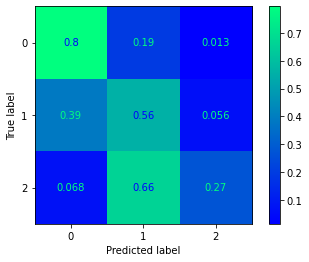

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       152
         1.0       0.54      0.56      0.55       124
         2.0       0.57      0.27      0.37        44

    accuracy                           0.63       320
   macro avg       0.61      0.54      0.56       320
weighted avg       0.62      0.63      0.62       320

R2 Score: 0.16640551551237848

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.11292432346572343
SVM - Linear, Test Accuracy = 0.634375, C=0.11292432346572343


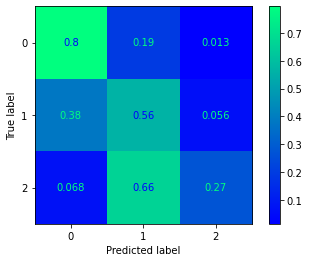

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       152
         1.0       0.55      0.56      0.56       124
         2.0       0.57      0.27      0.37        44

    accuracy                           0.63       320
   macro avg       0.61      0.54      0.56       320
weighted avg       0.63      0.63      0.62       320

R2 Score: 0.17267314321529292

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.13942251514427656
SVM - Linear, Test Accuracy = 0.634375, C=0.13942251514427656


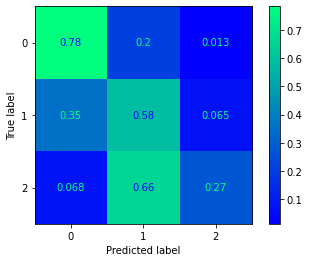

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       152
         1.0       0.55      0.58      0.56       124
         2.0       0.55      0.27      0.36        44

    accuracy                           0.63       320
   macro avg       0.60      0.55      0.56       320
weighted avg       0.63      0.63      0.62       320

R2 Score: 0.17267314321529292

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.17213862463436716
SVM - Linear, Test Accuracy = 0.628125, C=0.17213862463436716


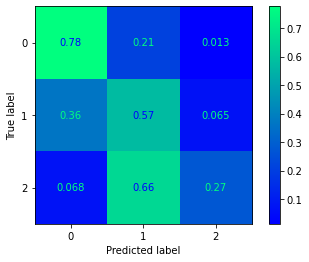

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       152
         1.0       0.54      0.57      0.55       124
         2.0       0.55      0.27      0.36        44

    accuracy                           0.63       320
   macro avg       0.60      0.54      0.55       320
weighted avg       0.62      0.63      0.62       320

R2 Score: 0.16013788780946403

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.2125317138365222
SVM - Linear, Test Accuracy = 0.625, C=0.2125317138365222


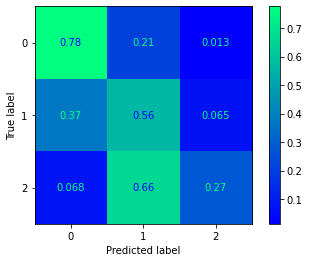

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       152
         1.0       0.53      0.56      0.55       124
         2.0       0.55      0.27      0.36        44

    accuracy                           0.62       320
   macro avg       0.60      0.54      0.55       320
weighted avg       0.62      0.62      0.61       320

R2 Score: 0.15387026010654958

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.2624032199759502
SVM - Linear, Test Accuracy = 0.628125, C=0.2624032199759502


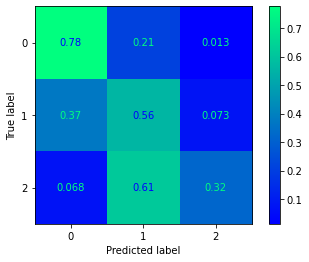

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       152
         1.0       0.54      0.56      0.55       124
         2.0       0.56      0.32      0.41        44

    accuracy                           0.63       320
   macro avg       0.60      0.55      0.56       320
weighted avg       0.62      0.63      0.62       320

R2 Score: 0.16013788780946403

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.32397729548593374
SVM - Linear, Test Accuracy = 0.63125, C=0.32397729548593374


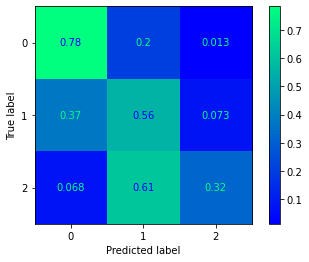

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       152
         1.0       0.54      0.56      0.55       124
         2.0       0.56      0.32      0.41        44

    accuracy                           0.63       320
   macro avg       0.60      0.55      0.57       320
weighted avg       0.62      0.63      0.62       320

R2 Score: 0.16640551551237848

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.4
SVM - Linear, Test Accuracy = 0.625, C=0.4


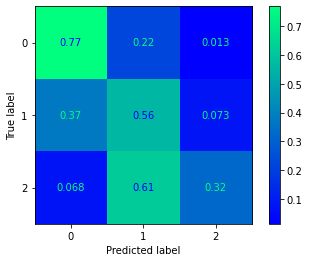

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.74       152
         1.0       0.53      0.56      0.55       124
         2.0       0.56      0.32      0.41        44

    accuracy                           0.62       320
   macro avg       0.60      0.55      0.56       320
weighted avg       0.62      0.62      0.62       320

R2 Score: 0.15387026010654958



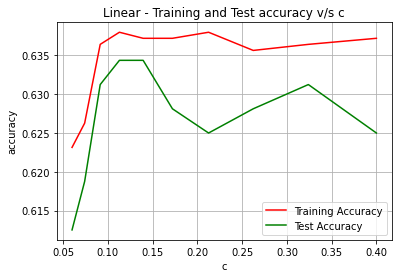

SVM - RBF, Train Accuracy = 0.7099296325254105, C=1.0
SVM - RBF, Test Accuracy = 0.646875, C=1.0


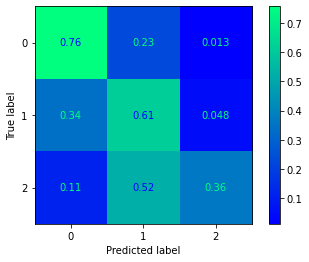

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       152
         1.0       0.57      0.61      0.59       124
         2.0       0.67      0.36      0.47        44

    accuracy                           0.65       320
   macro avg       0.65      0.58      0.60       320
weighted avg       0.65      0.65      0.64       320

R2 Score: 0.16013788780946403

SVM - RBF, Train Accuracy = 0.7177482408131353, C=1.4167822033014115
SVM - RBF, Test Accuracy = 0.65, C=1.4167822033014115


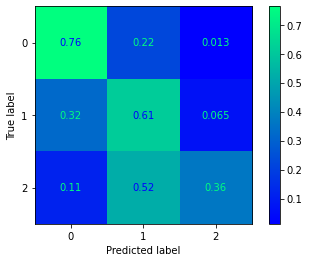

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       152
         1.0       0.57      0.61      0.59       124
         2.0       0.62      0.36      0.46        44

    accuracy                           0.65       320
   macro avg       0.64      0.58      0.60       320
weighted avg       0.65      0.65      0.64       320

R2 Score: 0.16640551551237848

SVM - RBF, Train Accuracy = 0.7333854573885848, C=2.0072718115916017
SVM - RBF, Test Accuracy = 0.653125, C=2.0072718115916017


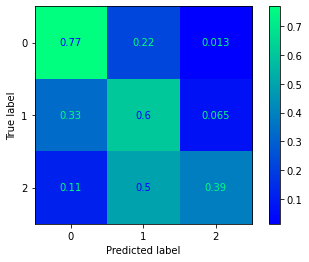

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       152
         1.0       0.58      0.60      0.59       124
         2.0       0.63      0.39      0.48        44

    accuracy                           0.65       320
   macro avg       0.64      0.59      0.60       320
weighted avg       0.65      0.65      0.65       320

R2 Score: 0.17267314321529292

SVM - RBF, Train Accuracy = 0.7505863956215794, C=2.8438669798515654
SVM - RBF, Test Accuracy = 0.65625, C=2.8438669798515654


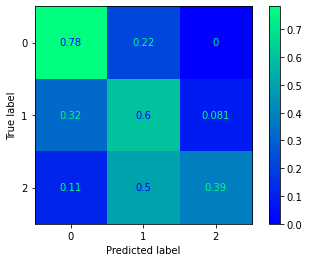

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       152
         1.0       0.57      0.60      0.58       124
         2.0       0.63      0.39      0.48        44

    accuracy                           0.66       320
   macro avg       0.64      0.59      0.61       320
weighted avg       0.65      0.66      0.65       320

R2 Score: 0.21654653713569405

SVM - RBF, Train Accuracy = 0.777951524628616, C=4.0291401256102315
SVM - RBF, Test Accuracy = 0.66875, C=4.0291401256102315


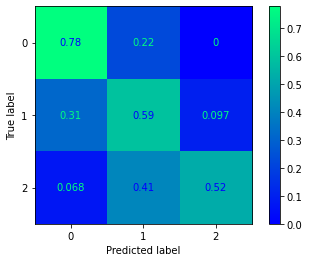

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       152
         1.0       0.58      0.59      0.59       124
         2.0       0.66      0.52      0.58        44

    accuracy                           0.67       320
   macro avg       0.66      0.63      0.64       320
weighted avg       0.67      0.67      0.67       320

R2 Score: 0.2792228141648385

SVM - RBF, Train Accuracy = 0.7826426896012509, C=5.708414024572189
SVM - RBF, Test Accuracy = 0.665625, C=5.708414024572189


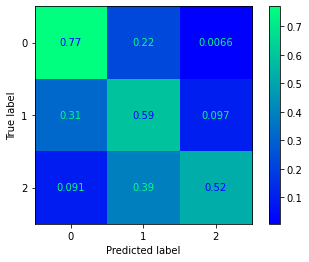

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       152
         1.0       0.59      0.59      0.59       124
         2.0       0.64      0.52      0.57        44

    accuracy                           0.67       320
   macro avg       0.65      0.63      0.64       320
weighted avg       0.66      0.67      0.66       320

R2 Score: 0.2353494202444374

SVM - RBF, Train Accuracy = 0.7959343236903831, C=8.087579399090064
SVM - RBF, Test Accuracy = 0.665625, C=8.087579399090064


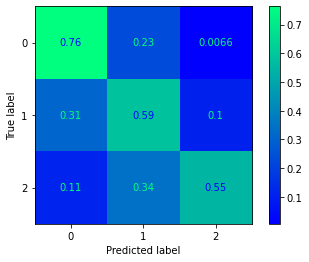

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       152
         1.0       0.59      0.59      0.59       124
         2.0       0.63      0.55      0.59        44

    accuracy                           0.67       320
   macro avg       0.65      0.63      0.64       320
weighted avg       0.66      0.67      0.66       320

R2 Score: 0.21654653713569405

SVM - RBF, Train Accuracy = 0.8178264268960125, C=11.458338560417927
SVM - RBF, Test Accuracy = 0.66875, C=11.458338560417927


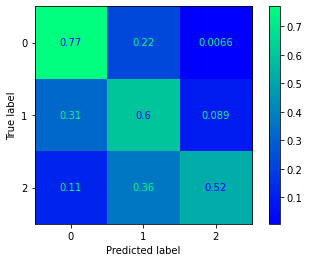

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       152
         1.0       0.60      0.60      0.60       124
         2.0       0.66      0.52      0.58        44

    accuracy                           0.67       320
   macro avg       0.66      0.63      0.64       320
weighted avg       0.67      0.67      0.67       320

R2 Score: 0.2228141648386085

SVM - RBF, Train Accuracy = 0.8279906176700548, C=16.23397015180243
SVM - RBF, Test Accuracy = 0.665625, C=16.23397015180243


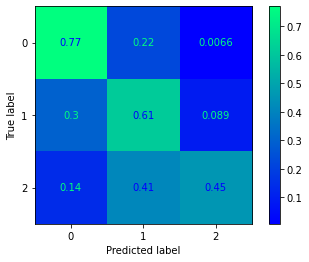

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       152
         1.0       0.59      0.61      0.60       124
         2.0       0.62      0.45      0.53        44

    accuracy                           0.67       320
   macro avg       0.65      0.61      0.63       320
weighted avg       0.66      0.67      0.66       320

R2 Score: 0.1977436540269507

SVM - RBF, Train Accuracy = 0.8467552775605942, C=23.0
SVM - RBF, Test Accuracy = 0.6625, C=23.0


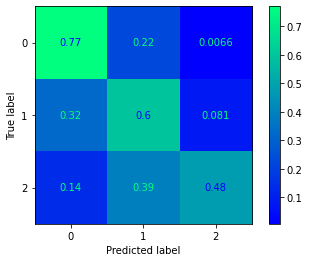

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       152
         1.0       0.59      0.60      0.59       124
         2.0       0.66      0.48      0.55        44

    accuracy                           0.66       320
   macro avg       0.66      0.61      0.63       320
weighted avg       0.66      0.66      0.66       320

R2 Score: 0.19147602632403626



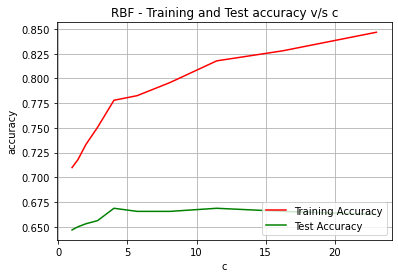

SVM - Poly, Train Accuracy = 0.6059421422986708, C=0.1
SVM - Poly, Test Accuracy = 0.56875, C=0.1


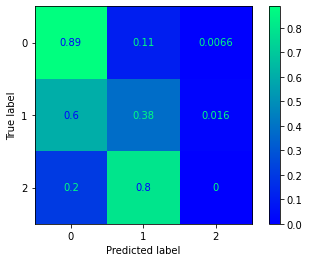

              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       152
         1.0       0.48      0.38      0.42       124
         2.0       0.00      0.00      0.00        44

    accuracy                           0.57       320
   macro avg       0.37      0.42      0.38       320
weighted avg       0.48      0.57      0.51       320

R2 Score: -0.05296145408962727

SVM - Poly, Train Accuracy = 0.6325254104769351, C=0.19947365987750282
SVM - Poly, Test Accuracy = 0.590625, C=0.19947365987750282


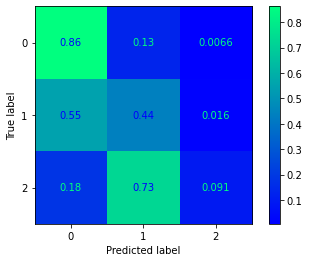

              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73       152
         1.0       0.51      0.44      0.47       124
         2.0       0.57      0.09      0.16        44

    accuracy                           0.59       320
   macro avg       0.57      0.46      0.45       320
weighted avg       0.58      0.59      0.55       320

R2 Score: 0.009714822939517309

SVM - Poly, Train Accuracy = 0.6583268178264269, C=0.3978974098492567
SVM - Poly, Test Accuracy = 0.621875, C=0.3978974098492567


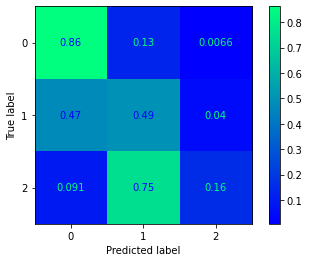

              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76       152
         1.0       0.54      0.49      0.51       124
         2.0       0.54      0.16      0.25        44

    accuracy                           0.62       320
   macro avg       0.58      0.50      0.51       320
weighted avg       0.60      0.62      0.59       320

R2 Score: 0.14760263240363514

SVM - Poly, Train Accuracy = 0.6770914777169664, C=0.7937005259840996
SVM - Poly, Test Accuracy = 0.659375, C=0.7937005259840996


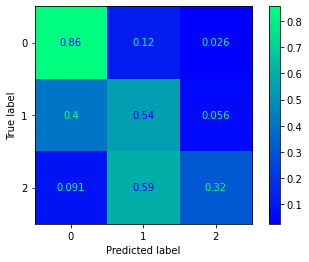

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77       152
         1.0       0.60      0.54      0.57       124
         2.0       0.56      0.32      0.41        44

    accuracy                           0.66       320
   macro avg       0.62      0.57      0.58       320
weighted avg       0.65      0.66      0.64       320

R2 Score: 0.16640551551237848

SVM - Poly, Train Accuracy = 0.7075840500390931, C=1.5832234876474738
SVM - Poly, Test Accuracy = 0.68125, C=1.5832234876474738


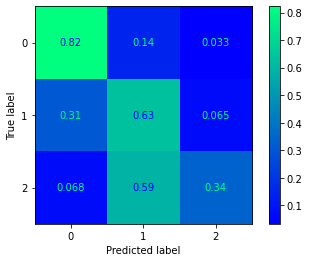

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.79       152
         1.0       0.62      0.63      0.62       124
         2.0       0.54      0.34      0.42        44

    accuracy                           0.68       320
   macro avg       0.64      0.60      0.61       320
weighted avg       0.67      0.68      0.67       320

R2 Score: 0.2102789094327796

SVM - Poly, Train Accuracy = 0.72869429241595, C=3.15811383485066
SVM - Poly, Test Accuracy = 0.66875, C=3.15811383485066


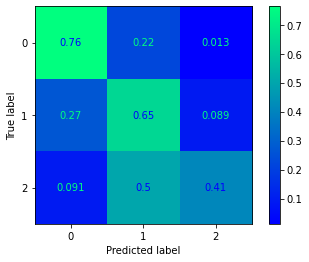

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       152
         1.0       0.59      0.65      0.62       124
         2.0       0.58      0.41      0.48        44

    accuracy                           0.67       320
   macro avg       0.64      0.61      0.62       320
weighted avg       0.67      0.67      0.67       320

R2 Score: 0.2228141648386085

SVM - Poly, Train Accuracy = 0.7576231430805317, C=6.2996052494743635
SVM - Poly, Test Accuracy = 0.665625, C=6.2996052494743635


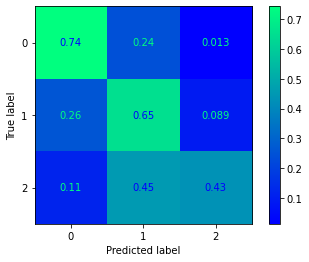

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       152
         1.0       0.59      0.65      0.62       124
         2.0       0.59      0.43      0.50        44

    accuracy                           0.67       320
   macro avg       0.64      0.61      0.62       320
weighted avg       0.67      0.67      0.66       320

R2 Score: 0.1977436540269507

SVM - Poly, Train Accuracy = 0.7826426896012509, C=12.566053148961805
SVM - Poly, Test Accuracy = 0.665625, C=12.566053148961805


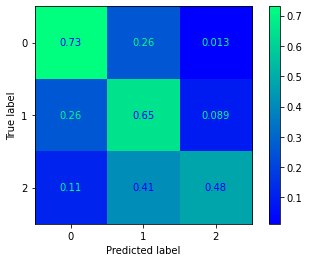

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       152
         1.0       0.59      0.65      0.62       124
         2.0       0.62      0.48      0.54        44

    accuracy                           0.67       320
   macro avg       0.65      0.62      0.63       320
weighted avg       0.67      0.67      0.67       320

R2 Score: 0.1977436540269507

SVM - Poly, Train Accuracy = 0.7967161845191556, C=25.065966118386303
SVM - Poly, Test Accuracy = 0.6375, C=25.065966118386303


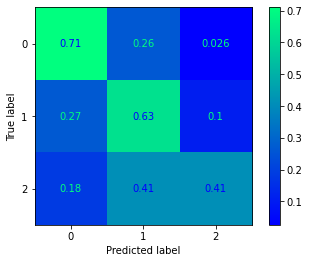

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       152
         1.0       0.57      0.63      0.60       124
         2.0       0.51      0.41      0.46        44

    accuracy                           0.64       320
   macro avg       0.60      0.58      0.59       320
weighted avg       0.64      0.64      0.64       320

R2 Score: 0.04732058915700399

SVM - Poly, Train Accuracy = 0.8123534010946052, C=50.0
SVM - Poly, Test Accuracy = 0.6375, C=50.0


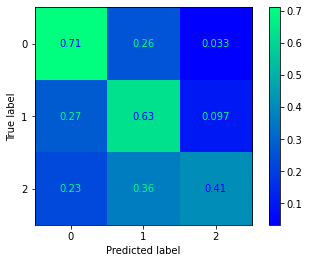

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       152
         1.0       0.59      0.63      0.61       124
         2.0       0.51      0.41      0.46        44

    accuracy                           0.64       320
   macro avg       0.60      0.58      0.59       320
weighted avg       0.64      0.64      0.64       320

R2 Score: -0.009088060169226031



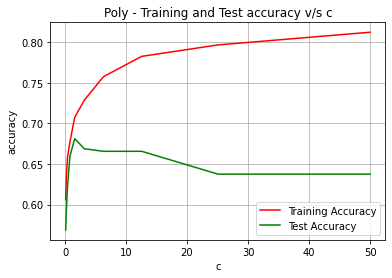

In [742]:
num_of_different_c = 10
c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [743]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(1599, 12)
[2. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
[[1.0400e+01 4.4000e-01 7.3000e-01 6.5500e+00 7.4000e-02 3.8000e+01
  7.6000e+01 9.9900e-01 3.1700e+00 8.5000e-01 1.2000e+01]
 [7.3000e+00 3.6500e-01 4.9000e-01 2.5000e+00 8.8000e-02 3.9000e+01
  1.0600e+02 9.9660e-01 3.3600e+00 7.8000e-01 1.1000e+01]
 [9.0000e+00 6.0000e-01 2.9000e-01 2.0000e+00 6.9000e-02 3.2000e+01
  7.3000e+01 9.9654e-01 3.3400e+00 5.7000e-01 1.0000e+01]
 [6.9000e+00 6.3000e-01 2.0000e-02 1.9000e+00 7.8000e-02 1.8000e+01
  3.0000e+01 9.9712e-01 3.4000e+00 7.5000e-01 9.8000e+00]
 [6.7000e+00 6.4000e-01 2.3000e-01 2.1000e+00 8.0000e-02 1.1000e+01
  1.1900e+02 9.9538e-01 3.3600e+00 7.0000e-01 1.0900e+01]
 [9.6000e+00 6.8000e-01 2.4000e-01 2.2000e+00 8.7000e-02 5.0000e+00
  2.8000e+01 9.9880e-01 3.1

SVM - Linear, Train Accuracy = 0.6215793588741204, C=0.06
SVM - Linear, Test Accuracy = 0.578125, C=0.06


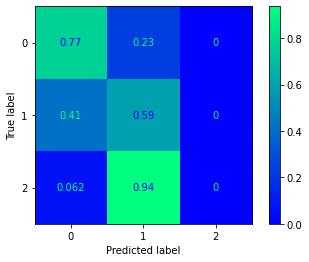

              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70       136
         1.0       0.51      0.59      0.55       136
         2.0       0.00      0.00      0.00        48

    accuracy                           0.58       320
   macro avg       0.38      0.45      0.42       320
weighted avg       0.49      0.58      0.53       320

R2 Score: 0.09887359198998735

SVM - Linear, Train Accuracy = 0.6254886630179828, C=0.07407926522752892
SVM - Linear, Test Accuracy = 0.590625, C=0.07407926522752892


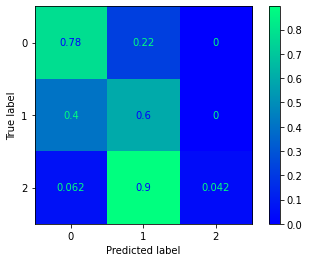

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       136
         1.0       0.53      0.60      0.56       136
         2.0       1.00      0.04      0.08        48

    accuracy                           0.59       320
   macro avg       0.72      0.47      0.45       320
weighted avg       0.65      0.59      0.55       320

R2 Score: 0.12390488110137665

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.09146229227750963
SVM - Linear, Test Accuracy = 0.5875, C=0.09146229227750963


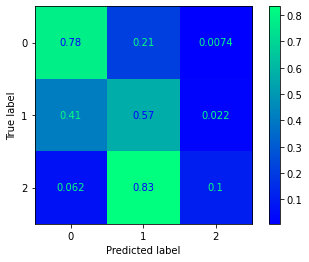

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       136
         1.0       0.53      0.57      0.55       136
         2.0       0.56      0.10      0.18        48

    accuracy                           0.59       320
   macro avg       0.58      0.48      0.48       320
weighted avg       0.58      0.59      0.56       320

R2 Score: 0.09887359198998735

SVM - Linear, Train Accuracy = 0.6411258795934324, C=0.11292432346572343
SVM - Linear, Test Accuracy = 0.590625, C=0.11292432346572343


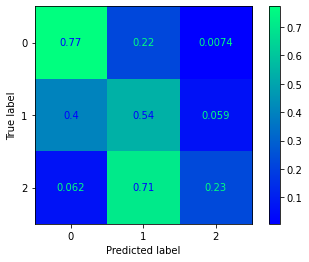

              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70       136
         1.0       0.53      0.54      0.53       136
         2.0       0.55      0.23      0.32        48

    accuracy                           0.59       320
   macro avg       0.58      0.51      0.52       320
weighted avg       0.58      0.59      0.57       320

R2 Score: 0.10513141426783468

SVM - Linear, Train Accuracy = 0.6419077404222049, C=0.13942251514427656
SVM - Linear, Test Accuracy = 0.590625, C=0.13942251514427656


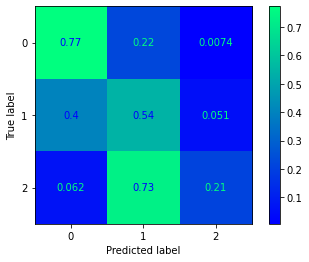

              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70       136
         1.0       0.53      0.54      0.54       136
         2.0       0.56      0.21      0.30        48

    accuracy                           0.59       320
   macro avg       0.58      0.51      0.51       320
weighted avg       0.58      0.59      0.57       320

R2 Score: 0.10513141426783468

SVM - Linear, Train Accuracy = 0.6411258795934324, C=0.17213862463436716
SVM - Linear, Test Accuracy = 0.590625, C=0.17213862463436716


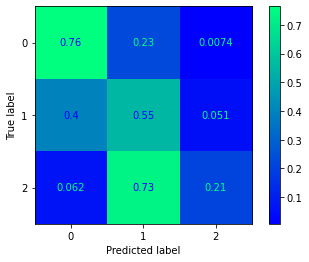

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70       136
         1.0       0.53      0.55      0.54       136
         2.0       0.56      0.21      0.30        48

    accuracy                           0.59       320
   macro avg       0.58      0.51      0.51       320
weighted avg       0.58      0.59      0.57       320

R2 Score: 0.10513141426783468

SVM - Linear, Train Accuracy = 0.6481626270523847, C=0.2125317138365222
SVM - Linear, Test Accuracy = 0.590625, C=0.2125317138365222


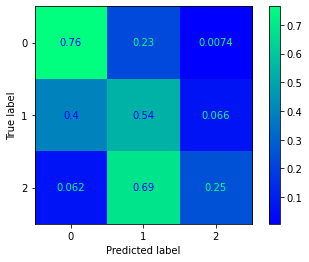

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70       136
         1.0       0.53      0.54      0.53       136
         2.0       0.55      0.25      0.34        48

    accuracy                           0.59       320
   macro avg       0.57      0.52      0.53       320
weighted avg       0.58      0.59      0.58       320

R2 Score: 0.10513141426783468

SVM - Linear, Train Accuracy = 0.6520719311962471, C=0.2624032199759502
SVM - Linear, Test Accuracy = 0.58125, C=0.2624032199759502


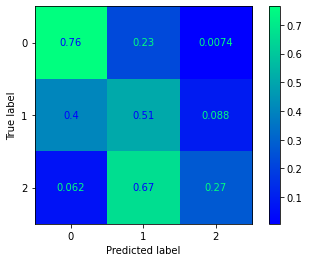

              precision    recall  f1-score   support

         0.0       0.64      0.76      0.70       136
         1.0       0.52      0.51      0.51       136
         2.0       0.50      0.27      0.35        48

    accuracy                           0.58       320
   macro avg       0.55      0.51      0.52       320
weighted avg       0.57      0.58      0.57       320

R2 Score: 0.08635794743429281

SVM - Linear, Train Accuracy = 0.6497263487099296, C=0.32397729548593374
SVM - Linear, Test Accuracy = 0.571875, C=0.32397729548593374


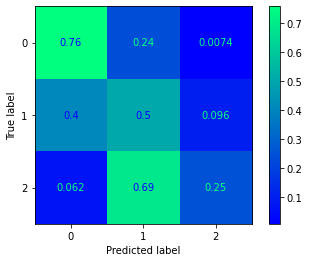

              precision    recall  f1-score   support

         0.0       0.64      0.76      0.69       136
         1.0       0.51      0.50      0.51       136
         2.0       0.46      0.25      0.32        48

    accuracy                           0.57       320
   macro avg       0.54      0.50      0.51       320
weighted avg       0.56      0.57      0.56       320

R2 Score: 0.06758448060075084

SVM - Linear, Train Accuracy = 0.6497263487099296, C=0.4
SVM - Linear, Test Accuracy = 0.575, C=0.4


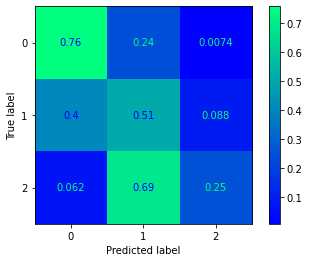

              precision    recall  f1-score   support

         0.0       0.64      0.76      0.69       136
         1.0       0.51      0.51      0.51       136
         2.0       0.48      0.25      0.33        48

    accuracy                           0.57       320
   macro avg       0.54      0.50      0.51       320
weighted avg       0.56      0.57      0.56       320

R2 Score: 0.07384230287859816



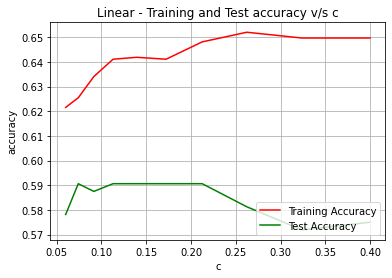

SVM - RBF, Train Accuracy = 0.7130570758405004, C=1.0
SVM - RBF, Test Accuracy = 0.6125, C=1.0


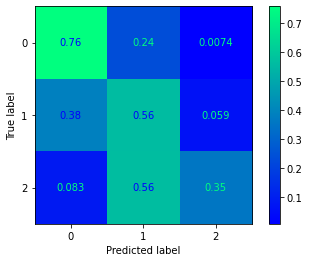

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70       136
         1.0       0.56      0.56      0.56       136
         2.0       0.65      0.35      0.46        48

    accuracy                           0.61       320
   macro avg       0.62      0.56      0.57       320
weighted avg       0.61      0.61      0.60       320

R2 Score: 0.13016270337922398

SVM - RBF, Train Accuracy = 0.7224394057857702, C=1.4167822033014115
SVM - RBF, Test Accuracy = 0.609375, C=1.4167822033014115


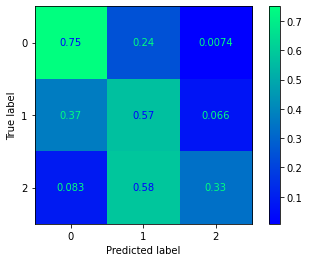

              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       136
         1.0       0.56      0.57      0.56       136
         2.0       0.62      0.33      0.43        48

    accuracy                           0.61       320
   macro avg       0.61      0.55      0.56       320
weighted avg       0.61      0.61      0.60       320

R2 Score: 0.12390488110137665

SVM - RBF, Train Accuracy = 0.7326035965598123, C=2.0072718115916017
SVM - RBF, Test Accuracy = 0.6125, C=2.0072718115916017


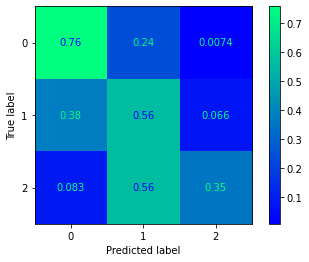

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70       136
         1.0       0.56      0.56      0.56       136
         2.0       0.63      0.35      0.45        48

    accuracy                           0.61       320
   macro avg       0.61      0.56      0.57       320
weighted avg       0.61      0.61      0.60       320

R2 Score: 0.13016270337922398

SVM - RBF, Train Accuracy = 0.7490226739640344, C=2.8438669798515654
SVM - RBF, Test Accuracy = 0.63125, C=2.8438669798515654


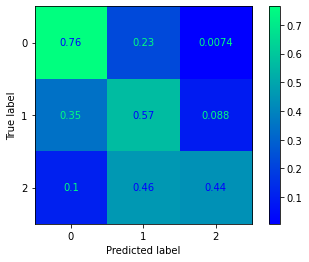

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       136
         1.0       0.59      0.57      0.58       136
         2.0       0.62      0.44      0.51        48

    accuracy                           0.63       320
   macro avg       0.63      0.59      0.60       320
weighted avg       0.63      0.63      0.63       320

R2 Score: 0.14893617021276584

SVM - RBF, Train Accuracy = 0.7740422204847537, C=4.0291401256102315
SVM - RBF, Test Accuracy = 0.64375, C=4.0291401256102315


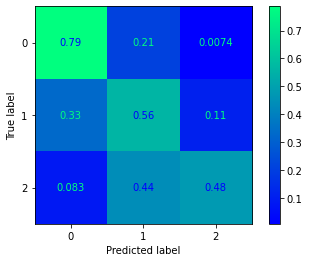

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73       136
         1.0       0.61      0.56      0.58       136
         2.0       0.59      0.48      0.53        48

    accuracy                           0.64       320
   macro avg       0.63      0.61      0.61       320
weighted avg       0.64      0.64      0.64       320

R2 Score: 0.192740926157697

SVM - RBF, Train Accuracy = 0.7959343236903831, C=5.708414024572189
SVM - RBF, Test Accuracy = 0.64375, C=5.708414024572189


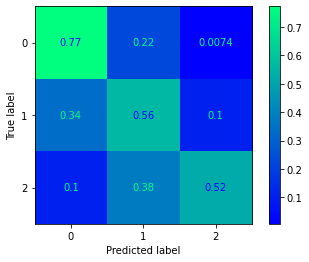

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       136
         1.0       0.61      0.56      0.58       136
         2.0       0.62      0.52      0.57        48

    accuracy                           0.64       320
   macro avg       0.64      0.62      0.62       320
weighted avg       0.64      0.64      0.64       320

R2 Score: 0.17396745932415514

SVM - RBF, Train Accuracy = 0.8139171227521501, C=8.087579399090064
SVM - RBF, Test Accuracy = 0.63125, C=8.087579399090064


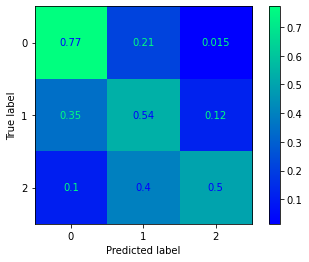

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       136
         1.0       0.60      0.54      0.57       136
         2.0       0.57      0.50      0.53        48

    accuracy                           0.63       320
   macro avg       0.61      0.60      0.61       320
weighted avg       0.63      0.63      0.63       320

R2 Score: 0.13016270337922398

SVM - RBF, Train Accuracy = 0.8256450351837373, C=11.458338560417927
SVM - RBF, Test Accuracy = 0.646875, C=11.458338560417927


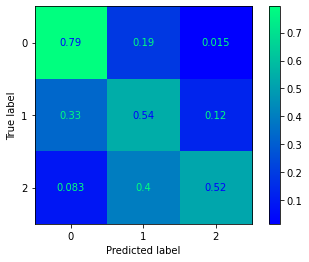

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       136
         1.0       0.62      0.54      0.58       136
         2.0       0.57      0.52      0.54        48

    accuracy                           0.65       320
   macro avg       0.63      0.62      0.62       320
weighted avg       0.64      0.65      0.64       320

R2 Score: 0.18022528160200246

SVM - RBF, Train Accuracy = 0.8342455043002346, C=16.23397015180243
SVM - RBF, Test Accuracy = 0.634375, C=16.23397015180243


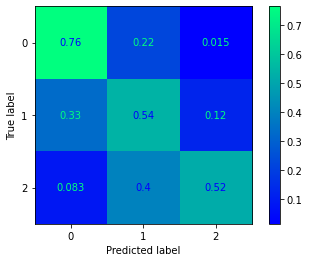

              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       136
         1.0       0.60      0.54      0.57       136
         2.0       0.57      0.52      0.54        48

    accuracy                           0.63       320
   macro avg       0.62      0.61      0.61       320
weighted avg       0.63      0.63      0.63       320

R2 Score: 0.15519399249061316

SVM - RBF, Train Accuracy = 0.8514464425332291, C=23.0
SVM - RBF, Test Accuracy = 0.63125, C=23.0


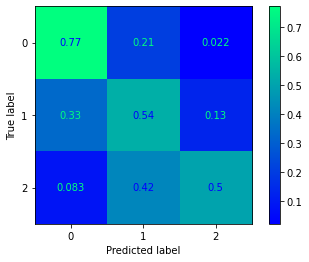

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       136
         1.0       0.60      0.54      0.57       136
         2.0       0.53      0.50      0.52        48

    accuracy                           0.63       320
   macro avg       0.61      0.60      0.60       320
weighted avg       0.63      0.63      0.63       320

R2 Score: 0.13016270337922398



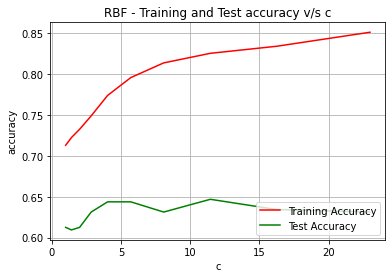

SVM - Poly, Train Accuracy = 0.5942142298670836, C=0.1
SVM - Poly, Test Accuracy = 0.528125, C=0.1


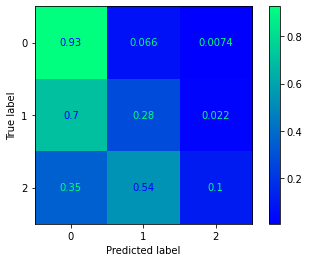

              precision    recall  f1-score   support

         0.0       0.53      0.93      0.67       136
         1.0       0.52      0.28      0.36       136
         2.0       0.56      0.10      0.18        48

    accuracy                           0.53       320
   macro avg       0.54      0.44      0.40       320
weighted avg       0.53      0.53      0.47       320

R2 Score: -0.28285356695869845

SVM - Poly, Train Accuracy = 0.6301798279906177, C=0.19947365987750282
SVM - Poly, Test Accuracy = 0.55, C=0.19947365987750282


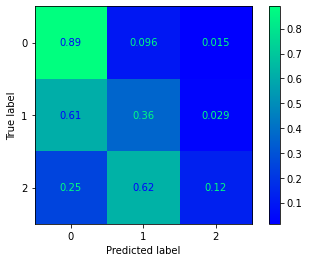

              precision    recall  f1-score   support

         0.0       0.56      0.89      0.69       136
         1.0       0.53      0.36      0.43       136
         2.0       0.50      0.12      0.20        48

    accuracy                           0.55       320
   macro avg       0.53      0.46      0.44       320
weighted avg       0.54      0.55      0.50       320

R2 Score: -0.16395494367959973

SVM - Poly, Train Accuracy = 0.6630179827990618, C=0.3978974098492567
SVM - Poly, Test Accuracy = 0.571875, C=0.3978974098492567


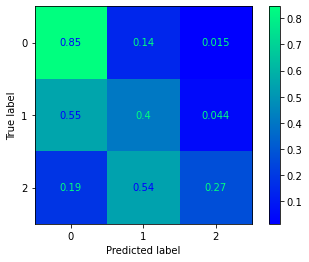

              precision    recall  f1-score   support

         0.0       0.58      0.85      0.69       136
         1.0       0.55      0.40      0.47       136
         2.0       0.62      0.27      0.38        48

    accuracy                           0.57       320
   macro avg       0.58      0.51      0.51       320
weighted avg       0.57      0.57      0.55       320

R2 Score: -0.06382978723404276

SVM - Poly, Train Accuracy = 0.6958561376075059, C=0.7937005259840996
SVM - Poly, Test Accuracy = 0.578125, C=0.7937005259840996


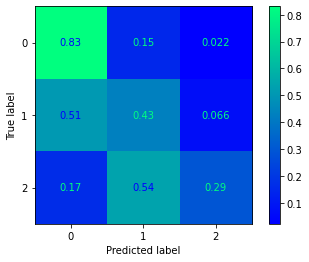

              precision    recall  f1-score   support

         0.0       0.59      0.83      0.69       136
         1.0       0.56      0.43      0.48       136
         2.0       0.54      0.29      0.38        48

    accuracy                           0.58       320
   macro avg       0.56      0.52      0.52       320
weighted avg       0.57      0.58      0.56       320

R2 Score: -0.05131414267834811

SVM - Poly, Train Accuracy = 0.72869429241595, C=1.5832234876474738
SVM - Poly, Test Accuracy = 0.615625, C=1.5832234876474738


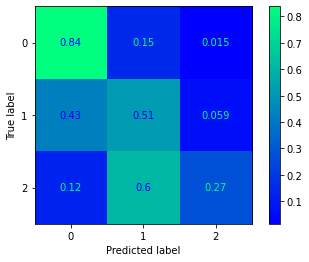

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73       136
         1.0       0.59      0.51      0.55       136
         2.0       0.57      0.27      0.37        48

    accuracy                           0.62       320
   macro avg       0.60      0.54      0.55       320
weighted avg       0.61      0.62      0.60       320

R2 Score: 0.08010012515644549

SVM - Poly, Train Accuracy = 0.7458952306489445, C=3.15811383485066
SVM - Poly, Test Accuracy = 0.625, C=3.15811383485066


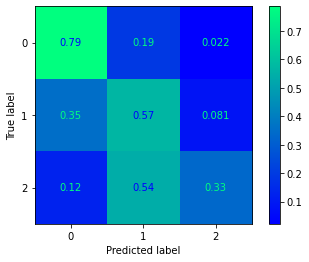

              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72       136
         1.0       0.60      0.57      0.58       136
         2.0       0.53      0.33      0.41        48

    accuracy                           0.62       320
   macro avg       0.60      0.56      0.57       320
weighted avg       0.62      0.62      0.61       320

R2 Score: 0.08010012515644549

SVM - Poly, Train Accuracy = 0.7568412822517592, C=6.2996052494743635
SVM - Poly, Test Accuracy = 0.603125, C=6.2996052494743635


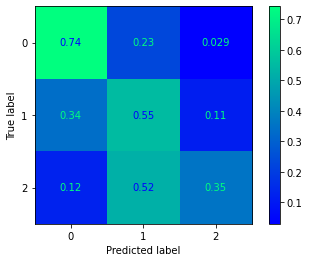

              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70       136
         1.0       0.57      0.55      0.56       136
         2.0       0.47      0.35      0.40        48

    accuracy                           0.60       320
   macro avg       0.57      0.55      0.56       320
weighted avg       0.59      0.60      0.60       320

R2 Score: 0.017521902377972354

SVM - Poly, Train Accuracy = 0.7849882720875684, C=12.566053148961805
SVM - Poly, Test Accuracy = 0.615625, C=12.566053148961805


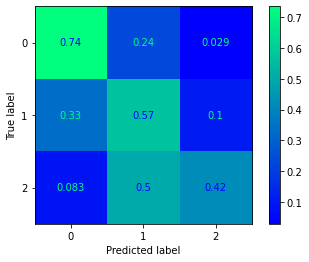

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70       136
         1.0       0.58      0.57      0.57       136
         2.0       0.53      0.42      0.47        48

    accuracy                           0.62       320
   macro avg       0.59      0.57      0.58       320
weighted avg       0.61      0.62      0.61       320

R2 Score: 0.08010012515644549

SVM - Poly, Train Accuracy = 0.7982799061767005, C=25.065966118386303
SVM - Poly, Test Accuracy = 0.615625, C=25.065966118386303


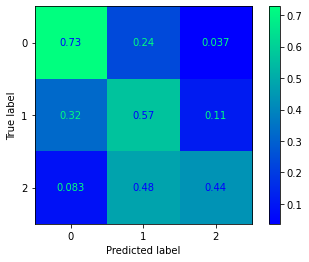

              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70       136
         1.0       0.58      0.57      0.57       136
         2.0       0.51      0.44      0.47        48

    accuracy                           0.62       320
   macro avg       0.59      0.58      0.58       320
weighted avg       0.61      0.62      0.61       320

R2 Score: 0.061326658322903516

SVM - Poly, Train Accuracy = 0.8131352619233776, C=50.0
SVM - Poly, Test Accuracy = 0.621875, C=50.0


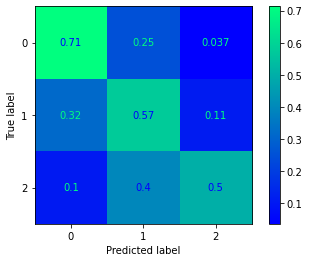

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       136
         1.0       0.60      0.57      0.58       136
         2.0       0.55      0.50      0.52        48

    accuracy                           0.62       320
   macro avg       0.60      0.60      0.60       320
weighted avg       0.62      0.62      0.62       320

R2 Score: 0.05506883604505619



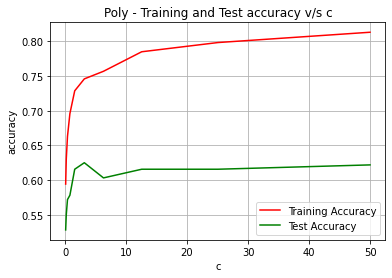

In [744]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [745]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(1599, 12)
[2. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
[[1.0400e+01 4.4000e-01 7.3000e-01 6.5500e+00 7.4000e-02 3.8000e+01
  7.6000e+01 9.9900e-01 3.1700e+00 8.5000e-01 1.2000e+01]
 [7.3000e+00 3.6500e-01 4.9000e-01 2.5000e+00 8.8000e-02 3.9000e+01
  1.0600e+02 9.9660e-01 3.3600e+00 7.8000e-01 1.1000e+01]
 [9.0000e+00 6.0000e-01 2.9000e-01 2.0000e+00 6.9000e-02 3.2000e+01
  7.3000e+01 9.9654e-01 3.3400e+00 5.7000e-01 1.0000e+01]
 [6.9000e+00 6.3000e-01 2.0000e-02 1.9000e+00 7.8000e-02 1.8000e+01
  3.0000e+01 9.9712e-01 3.4000e+00 7.5000e-01 9.8000e+00]
 [6.7000e+00 6.4000e-01 2.3000e-01 2.1000e+00 8.0000e-02 1.1000e+01
  1.1900e+02 9.9538e-01 3.3600e+00 7.0000e-01 1.0900e+01]
 [9.6000e+00 6.8000e-01 2.4000e-01 2.2000e+00 8.7000e-02 5.0000e+00
  2.8000e+01 9.9880e-01 3.1

SVM - Linear, Train Accuracy = 0.6458170445660673, C=0.06
SVM - Linear, Test Accuracy = 0.590625, C=0.06


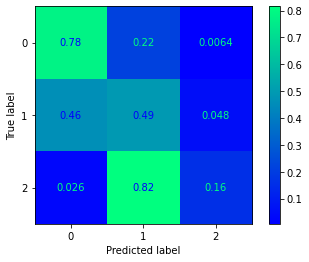

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       156
         1.0       0.49      0.49      0.49       126
         2.0       0.46      0.16      0.24        38

    accuracy                           0.59       320
   macro avg       0.54      0.48      0.48       320
weighted avg       0.57      0.59      0.57       320

R2 Score: 0.08962538416812005

SVM - Linear, Train Accuracy = 0.6465989053948398, C=0.07407926522752892
SVM - Linear, Test Accuracy = 0.590625, C=0.07407926522752892


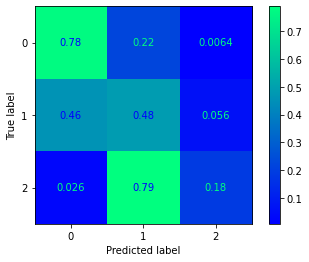

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       156
         1.0       0.49      0.48      0.49       126
         2.0       0.47      0.18      0.26        38

    accuracy                           0.59       320
   macro avg       0.54      0.48      0.49       320
weighted avg       0.58      0.59      0.57       320

R2 Score: 0.08962538416812005

SVM - Linear, Train Accuracy = 0.6497263487099296, C=0.09146229227750963
SVM - Linear, Test Accuracy = 0.59375, C=0.09146229227750963


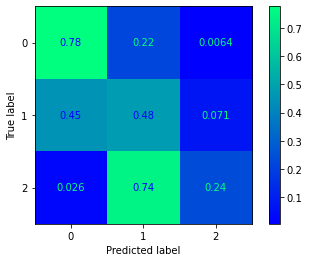

              precision    recall  f1-score   support

         0.0       0.68      0.78      0.72       156
         1.0       0.49      0.48      0.48       126
         2.0       0.47      0.24      0.32        38

    accuracy                           0.59       320
   macro avg       0.55      0.50      0.51       320
weighted avg       0.58      0.59      0.58       320

R2 Score: 0.09627045435667392

SVM - Linear, Train Accuracy = 0.6465989053948398, C=0.11292432346572343
SVM - Linear, Test Accuracy = 0.5875, C=0.11292432346572343


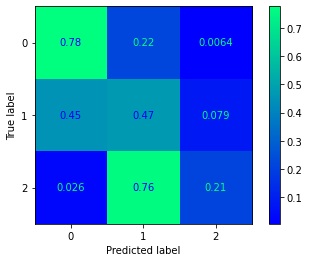

              precision    recall  f1-score   support

         0.0       0.68      0.78      0.72       156
         1.0       0.48      0.47      0.48       126
         2.0       0.42      0.21      0.28        38

    accuracy                           0.59       320
   macro avg       0.53      0.48      0.49       320
weighted avg       0.57      0.59      0.57       320

R2 Score: 0.08298031397956618

SVM - Linear, Train Accuracy = 0.6512900703674745, C=0.13942251514427656
SVM - Linear, Test Accuracy = 0.584375, C=0.13942251514427656


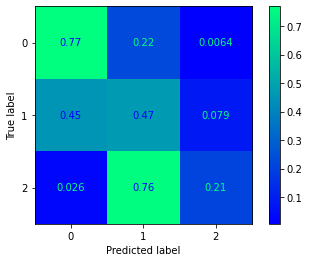

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.48      0.47      0.47       126
         2.0       0.42      0.21      0.28        38

    accuracy                           0.58       320
   macro avg       0.52      0.48      0.49       320
weighted avg       0.57      0.58      0.57       320

R2 Score: 0.07633524379101231

SVM - Linear, Train Accuracy = 0.653635652853792, C=0.17213862463436716
SVM - Linear, Test Accuracy = 0.584375, C=0.17213862463436716


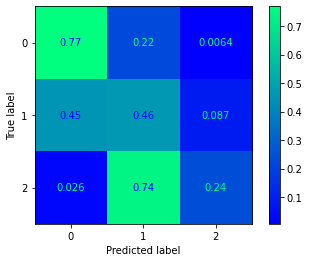

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.48      0.46      0.47       126
         2.0       0.43      0.24      0.31        38

    accuracy                           0.58       320
   macro avg       0.53      0.49      0.50       320
weighted avg       0.57      0.58      0.57       320

R2 Score: 0.07633524379101231

SVM - Linear, Train Accuracy = 0.6528537920250196, C=0.2125317138365222
SVM - Linear, Test Accuracy = 0.58125, C=0.2125317138365222


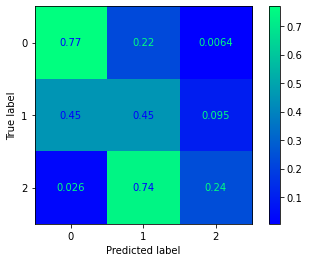

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.47      0.45      0.46       126
         2.0       0.41      0.24      0.30        38

    accuracy                           0.58       320
   macro avg       0.52      0.49      0.49       320
weighted avg       0.56      0.58      0.57       320

R2 Score: 0.06969017360245844

SVM - Linear, Train Accuracy = 0.6528537920250196, C=0.2624032199759502
SVM - Linear, Test Accuracy = 0.578125, C=0.2624032199759502


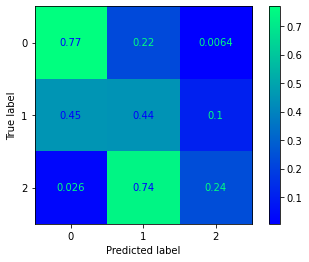

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.47      0.44      0.46       126
         2.0       0.39      0.24      0.30        38

    accuracy                           0.58       320
   macro avg       0.51      0.48      0.49       320
weighted avg       0.56      0.58      0.57       320

R2 Score: 0.06304510341390457

SVM - Linear, Train Accuracy = 0.6544175136825645, C=0.32397729548593374
SVM - Linear, Test Accuracy = 0.575, C=0.32397729548593374


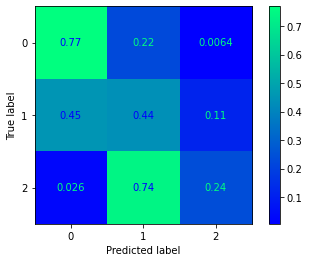

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.47      0.44      0.45       126
         2.0       0.38      0.24      0.29        38

    accuracy                           0.57       320
   macro avg       0.51      0.48      0.49       320
weighted avg       0.56      0.57      0.56       320

R2 Score: 0.0564000332253507

SVM - Linear, Train Accuracy = 0.6575449569976545, C=0.4
SVM - Linear, Test Accuracy = 0.578125, C=0.4


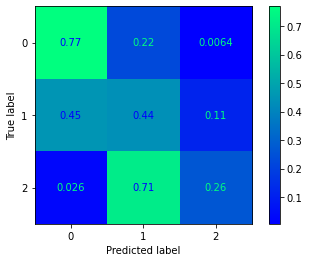

              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       156
         1.0       0.47      0.44      0.45       126
         2.0       0.40      0.26      0.32        38

    accuracy                           0.58       320
   macro avg       0.51      0.49      0.50       320
weighted avg       0.56      0.58      0.57       320

R2 Score: 0.06304510341390457



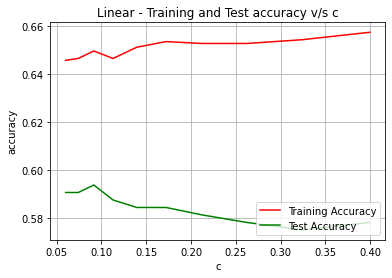

SVM - RBF, Train Accuracy = 0.7240031274433151, C=1.0
SVM - RBF, Test Accuracy = 0.6125, C=1.0


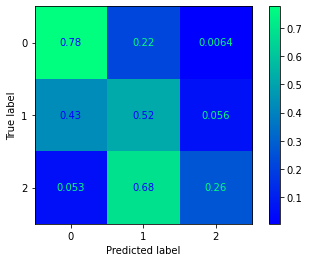

              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73       156
         1.0       0.52      0.52      0.52       126
         2.0       0.56      0.26      0.36        38

    accuracy                           0.61       320
   macro avg       0.59      0.52      0.53       320
weighted avg       0.60      0.61      0.60       320

R2 Score: 0.11620566492233553

SVM - RBF, Train Accuracy = 0.7341673182173573, C=1.4167822033014115
SVM - RBF, Test Accuracy = 0.6125, C=1.4167822033014115


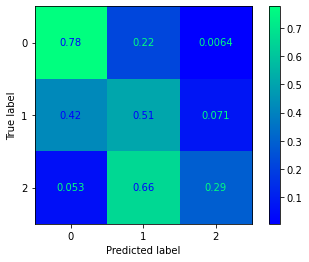

              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       156
         1.0       0.52      0.51      0.51       126
         2.0       0.52      0.29      0.37        38

    accuracy                           0.61       320
   macro avg       0.58      0.52      0.54       320
weighted avg       0.60      0.61      0.60       320

R2 Score: 0.11620566492233553

SVM - RBF, Train Accuracy = 0.7505863956215794, C=2.0072718115916017
SVM - RBF, Test Accuracy = 0.60625, C=2.0072718115916017


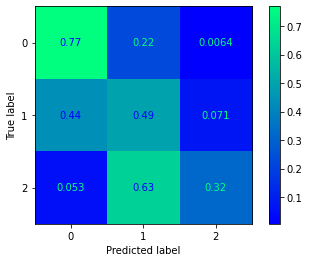

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       156
         1.0       0.51      0.49      0.50       126
         2.0       0.55      0.32      0.40        38

    accuracy                           0.61       320
   macro avg       0.58      0.53      0.54       320
weighted avg       0.60      0.61      0.60       320

R2 Score: 0.10291552454522779

SVM - RBF, Train Accuracy = 0.7584050039093041, C=2.8438669798515654
SVM - RBF, Test Accuracy = 0.6125, C=2.8438669798515654


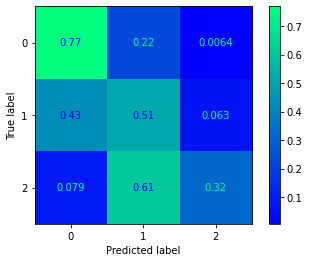

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       156
         1.0       0.52      0.51      0.52       126
         2.0       0.57      0.32      0.41        38

    accuracy                           0.61       320
   macro avg       0.59      0.53      0.55       320
weighted avg       0.60      0.61      0.60       320

R2 Score: 0.09627045435667392

SVM - RBF, Train Accuracy = 0.7677873338545739, C=4.0291401256102315
SVM - RBF, Test Accuracy = 0.6125, C=4.0291401256102315


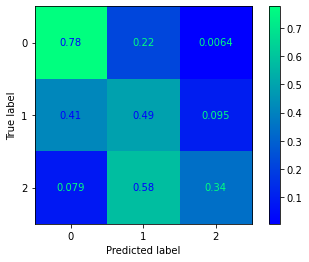

              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       156
         1.0       0.53      0.49      0.51       126
         2.0       0.50      0.34      0.41        38

    accuracy                           0.61       320
   macro avg       0.57      0.54      0.55       320
weighted avg       0.60      0.61      0.60       320

R2 Score: 0.09627045435667392

SVM - RBF, Train Accuracy = 0.7865519937451134, C=5.708414024572189
SVM - RBF, Test Accuracy = 0.63125, C=5.708414024572189


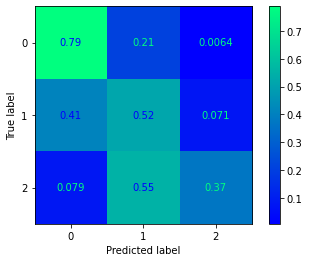

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.52      0.53       126
         2.0       0.58      0.37      0.45        38

    accuracy                           0.63       320
   macro avg       0.61      0.56      0.57       320
weighted avg       0.62      0.63      0.62       320

R2 Score: 0.13614087548799703

SVM - RBF, Train Accuracy = 0.7982799061767005, C=8.087579399090064
SVM - RBF, Test Accuracy = 0.640625, C=8.087579399090064


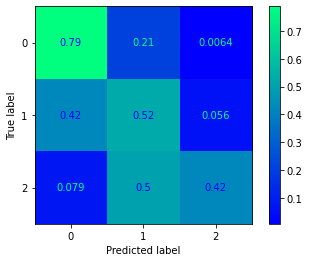

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73       156
         1.0       0.56      0.52      0.54       126
         2.0       0.67      0.42      0.52        38

    accuracy                           0.64       320
   macro avg       0.64      0.58      0.60       320
weighted avg       0.64      0.64      0.63       320

R2 Score: 0.15607608605365864

SVM - RBF, Train Accuracy = 0.8146989835809226, C=11.458338560417927
SVM - RBF, Test Accuracy = 0.653125, C=11.458338560417927


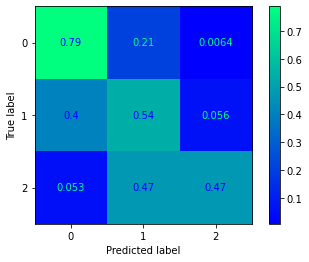

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       156
         1.0       0.58      0.54      0.56       126
         2.0       0.69      0.47      0.56        38

    accuracy                           0.65       320
   macro avg       0.66      0.60      0.62       320
weighted avg       0.65      0.65      0.65       320

R2 Score: 0.20259157737353573

SVM - RBF, Train Accuracy = 0.838154808444097, C=16.23397015180243
SVM - RBF, Test Accuracy = 0.675, C=16.23397015180243


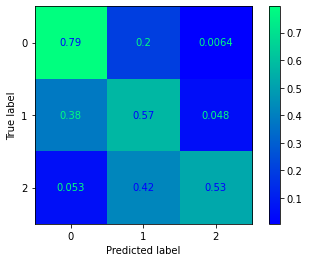

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.61      0.57      0.59       126
         2.0       0.74      0.53      0.62        38

    accuracy                           0.68       320
   macro avg       0.69      0.63      0.65       320
weighted avg       0.67      0.68      0.67       320

R2 Score: 0.24910706869341281

SVM - RBF, Train Accuracy = 0.8467552775605942, C=23.0
SVM - RBF, Test Accuracy = 0.671875, C=23.0


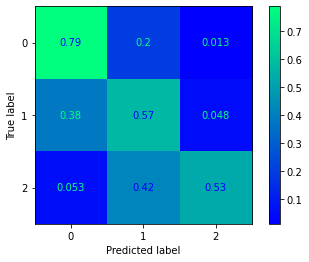

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.61      0.57      0.59       126
         2.0       0.71      0.53      0.61        38

    accuracy                           0.67       320
   macro avg       0.68      0.63      0.65       320
weighted avg       0.67      0.67      0.67       320

R2 Score: 0.22252678793919733



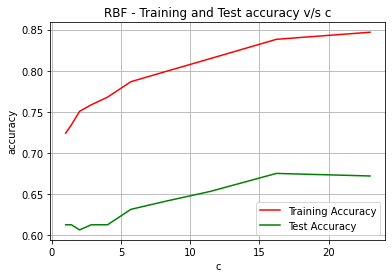

SVM - Poly, Train Accuracy = 0.6098514464425332, C=0.1
SVM - Poly, Test Accuracy = 0.565625, C=0.1


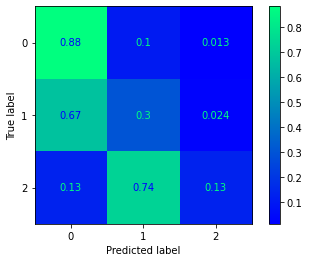

              precision    recall  f1-score   support

         0.0       0.61      0.88      0.72       156
         1.0       0.46      0.30      0.37       126
         2.0       0.50      0.13      0.21        38

    accuracy                           0.57       320
   macro avg       0.52      0.44      0.43       320
weighted avg       0.54      0.57      0.52       320

R2 Score: -0.06321123016861896

SVM - Poly, Train Accuracy = 0.6403440187646599, C=0.19947365987750282
SVM - Poly, Test Accuracy = 0.565625, C=0.19947365987750282


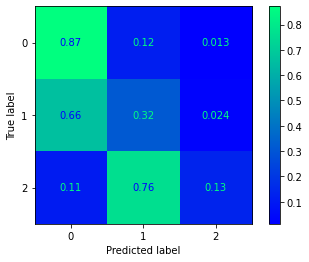

              precision    recall  f1-score   support

         0.0       0.61      0.87      0.72       156
         1.0       0.46      0.32      0.38       126
         2.0       0.50      0.13      0.21        38

    accuracy                           0.57       320
   macro avg       0.52      0.44      0.43       320
weighted avg       0.54      0.57      0.52       320

R2 Score: -0.04327601960295735

SVM - Poly, Train Accuracy = 0.6739640344018765, C=0.3978974098492567
SVM - Poly, Test Accuracy = 0.565625, C=0.3978974098492567


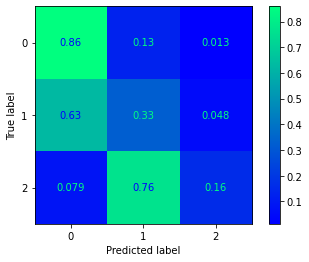

              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       156
         1.0       0.46      0.33      0.38       126
         2.0       0.43      0.16      0.23        38

    accuracy                           0.57       320
   macro avg       0.50      0.45      0.44       320
weighted avg       0.53      0.57      0.53       320

R2 Score: -0.02334080903729574

SVM - Poly, Train Accuracy = 0.7028928850664582, C=0.7937005259840996
SVM - Poly, Test Accuracy = 0.596875, C=0.7937005259840996


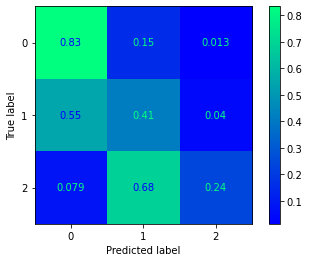

              precision    recall  f1-score   support

         0.0       0.64      0.83      0.73       156
         1.0       0.51      0.41      0.46       126
         2.0       0.56      0.24      0.33        38

    accuracy                           0.60       320
   macro avg       0.57      0.49      0.51       320
weighted avg       0.58      0.60      0.57       320

R2 Score: 0.04310989284824296

SVM - Poly, Train Accuracy = 0.7216575449569976, C=1.5832234876474738
SVM - Poly, Test Accuracy = 0.615625, C=1.5832234876474738


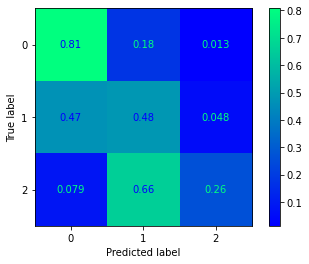

              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       156
         1.0       0.54      0.48      0.51       126
         2.0       0.56      0.26      0.36        38

    accuracy                           0.62       320
   macro avg       0.59      0.52      0.53       320
weighted avg       0.60      0.62      0.60       320

R2 Score: 0.08298031397956618

SVM - Poly, Train Accuracy = 0.7388584831899921, C=3.15811383485066
SVM - Poly, Test Accuracy = 0.64375, C=3.15811383485066


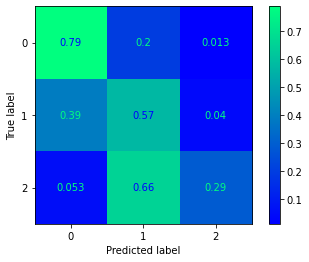

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.56      0.57      0.57       126
         2.0       0.61      0.29      0.39        38

    accuracy                           0.64       320
   macro avg       0.63      0.55      0.57       320
weighted avg       0.64      0.64      0.63       320

R2 Score: 0.1627211562422125

SVM - Poly, Train Accuracy = 0.7584050039093041, C=6.2996052494743635
SVM - Poly, Test Accuracy = 0.634375, C=6.2996052494743635


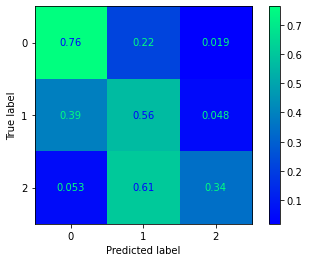

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73       156
         1.0       0.55      0.56      0.56       126
         2.0       0.59      0.34      0.43        38

    accuracy                           0.63       320
   macro avg       0.62      0.56      0.57       320
weighted avg       0.63      0.63      0.63       320

R2 Score: 0.1228507351108894

SVM - Poly, Train Accuracy = 0.784206411258796, C=12.566053148961805
SVM - Poly, Test Accuracy = 0.653125, C=12.566053148961805


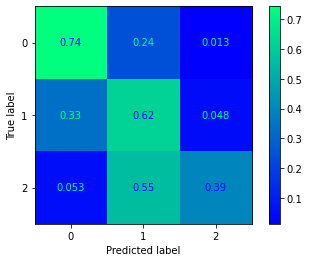

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       156
         1.0       0.57      0.62      0.59       126
         2.0       0.65      0.39      0.49        38

    accuracy                           0.65       320
   macro avg       0.65      0.59      0.61       320
weighted avg       0.66      0.65      0.65       320

R2 Score: 0.18265636680787412

SVM - Poly, Train Accuracy = 0.800625488663018, C=25.065966118386303
SVM - Poly, Test Accuracy = 0.653125, C=25.065966118386303


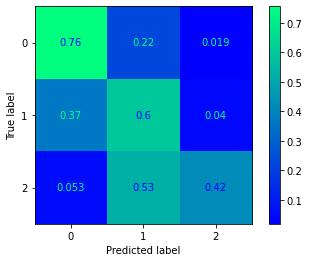

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       156
         1.0       0.58      0.60      0.59       126
         2.0       0.67      0.42      0.52        38

    accuracy                           0.65       320
   macro avg       0.65      0.59      0.61       320
weighted avg       0.65      0.65      0.65       320

R2 Score: 0.1627211562422125

SVM - Poly, Train Accuracy = 0.8162627052384676, C=50.0
SVM - Poly, Test Accuracy = 0.678125, C=50.0


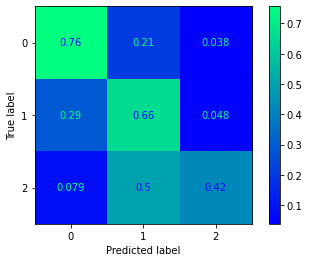

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       156
         1.0       0.62      0.66      0.64       126
         2.0       0.57      0.42      0.48        38

    accuracy                           0.68       320
   macro avg       0.65      0.61      0.62       320
weighted avg       0.68      0.68      0.68       320

R2 Score: 0.13614087548799703



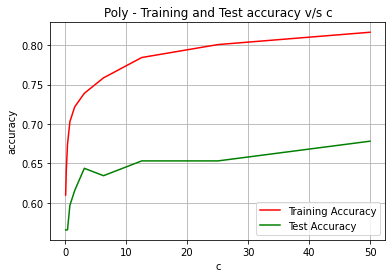

In [746]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)